# Exploring Satellite Data
We have some satellite data available for you to explore on JASMIN. The data is available under:
 - On JASMIN: `/gws/pw/j07/rsg_share/public/transfer/drobbins/small-scale/WonderWeekRSG2025/SISEM`
 - Via HTTPS: [WonderWeek2025/SISEM](https://gws-access.jasmin.ac.uk/public/rsg_share/transfer/drobbins/small-scale/WonderWeekRSG2025/SISEM)

In [1]:
# We always need to start by importing the basic modules we want to use in the rest of this notebook
import os # This module lets us deal with paths more flexibly than just typing out paths all the time
import socket # This module will be used to let us know if we're on JASMIN or not
from datetime import datetime as dt, timedelta # This is the datetime package and it is very useful for handling dates and times in general
import xarray as xr # This is the major module for reading in satellite data for Python; it can read a range of file types, including netCDF4
import numpy as np # The numpy module is probably the most useful package with have (besides xarray) for data manipulation
import matplotlib.pyplot as plt # This is the standard plotting module for Python and is compatible with several other modules
import matplotlib.animation as animation # This module allows us to generate short movies
import cartopy.crs as ccrs # This module allows us to plot data on proper maps in conjunction with pyplot
import cartopy.feature as cf # This module gives us the option to add decorative stuff to our maps, like different colours for land and ocean

## Dealing with satellite data

In [ ]:
# At first, we need to get some data to look at
# The path to the data will depend on if you're doing this locally on your personal computer or on JASMIN
if '.ac.uk' not in socket.gethostname(): # Assume we're on a local machine
    path_to_data = '/path/to/data' # You'll need to set this to the folder (also called a directory) where the data is kept
else: # On JASMIN, this is /gws/pw/j07/rsg_share/public/transfer/drobbins/small-scale/WonderWeekRSG2025/SISEM
    path_to_data = '/gws/pw/j07/rsg_share/public/transfer/drobbins/small-scale/WonderWeekRSG2025/SISEM'
# We'll try to look at just a single file for now
filename = 'NCEO-L2-CLOUD-AEROSOL-SEVIRI_ORAC_MSG3_202502041200_R9999.primary.nc'
# However, this file should be stored down a path that includes the year, month and day
full_filename = os.path.join(
    path_to_data,
    '2025', # This assumes that the data is stored under the path it should be on JASMIN.
    '02', # If you don't have this level of detail in your path, comment these lines out,
    '04', # including this line too.
    filename
)
# Now we have the correct filename including the full path to the data, we can load it in
satellite_data = xr.open_dataset(full_filename)
satellite_data

/home/users/dr1709/miniforge3/envs/WonderWeek2025/lib/python3.13/site-packages/xarray/coding/times.py:365: CFWarning: this date/calendar/year zero convention is not supported by CF
  cftime.num2date(num_dates, units, calendar, only_use_cftime_datetimes=True)


<xarray.Dataset> Size: 56MB
Dimensions:                                   (along_track: 400,
                                               across_track: 400, views: 1)
Dimensions without coordinates: along_track, across_track, views
Data variables: (12/74)
    time                                      (along_track, across_track) datetime64[ns] 1MB ...
    lat                                       (along_track, across_track) float32 640kB ...
    lon                                       (along_track, across_track) float32 640kB ...
    solar_zenith_view_no1                     (along_track, across_track) float32 640kB ...
    satellite_zenith_view_no1                 (along_track, across_track) float32 640kB ...
    rel_azimuth_view_no1                      (along_track, across_track) float32 640kB ...
    ...                                        ...
    cldmask_uncertainty                       (views, along_track, across_track) float32 640kB ...
    ann_phase                                 (views, along_track, across_track) float64 1MB ...
    cphcot                                    (views, along_track, across_track) float32 640kB ...
    ann_phase_uncertainty                     (views, along_track, across_track) float32 640kB ...
    phase                                     (along_track, across_track) float64 1MB ...
    phase_pavolonis                           (along_track, across_track) float64 1MB ...
Attributes: (12/35)
    Conventions:           CF-1.4
    title:                 ESA Cloud CCI Retrieval Products L2 Primary File
    institution:           RAL_Space
    source:                null
    history:               n/a
    references:            doi:10.5194/amt-5-1889-2012
    ...                    ...
    Emissivity_File:       /gws/nopw/j04/nceo_generic/cloud_ecv/data_in/emiss...
    USGS_File:             /gws/nopw/j04/aerosol_cci/proud/GEO_FILES/MSG_000E...
    Snow_File:             /gws/pw/j07/rsgnceo/scratch/sisem_nrt/ecmwf/c1/202...
    Sea_Ice_File:          /gws/pw/j07/rsgnceo/scratch/sisem_nrt/ecmwf/c1/202...
    Level1b_File:          /work/scratch-nopw2/dhegedus/sisem_nrt/hrit/2025/0...
    Geo_File:              /work/scratch-nopw2/dhegedus/sisem_nrt/hrit/2025/0...

In [ ]:
# We now know how to open satellite data, but it's generally distributed in several files for the same granule/timestep to make file transfer easier
# For this data, we have 3 files per granule: primary, secondary and bugsrad. We want to have a look at all the data,  so we'll load them all in together
# TIP: We can do this very easily using .replace on the <full_filename> string and then using xarray's open_mfdataset function
satellite_data = xr.open_mfdataset(
    [
        full_filename.replace('.primary.', '.' + filetype + '.')
        for filetype
        in [
            'primary',
            'secondary',
            'bugsrad'
        ]
    ]
)
# You should notice this data has a lot more varibales to play with
satellite_data

/home/users/dr1709/miniforge3/envs/WonderWeek2025/lib/python3.13/site-packages/xarray/coding/times.py:365: CFWarning: this date/calendar/year zero convention is not supported by CF
  cftime.num2date(num_dates, units, calendar, only_use_cftime_datetimes=True)
/home/users/dr1709/miniforge3/envs/WonderWeek2025/lib/python3.13/site-packages/xarray/coding/times.py:365: CFWarning: this date/calendar/year zero convention is not supported by CF
  cftime.num2date(num_dates, units, calendar, only_use_cftime_datetimes=True)
/home/users/dr1709/miniforge3/envs/WonderWeek2025/lib/python3.13/site-packages/xarray/coding/times.py:365: CFWarning: this date/calendar/year zero convention is not supported by CF
  cftime.num2date(num_dates, units, calendar, only_use_cftime_datetimes=True)


<xarray.Dataset> Size: 108MB
Dimensions:                                             (along_track: 400,
                                                         across_track: 400,
                                                         views: 1)
Dimensions without coordinates: along_track, across_track, views
Data variables: (12/152)
    time                                                (along_track, across_track) datetime64[ns] 1MB dask.array<chunksize=(400, 400), meta=np.ndarray>
    lat                                                 (along_track, across_track) float32 640kB dask.array<chunksize=(400, 400), meta=np.ndarray>
    lon                                                 (along_track, across_track) float32 640kB dask.array<chunksize=(400, 400), meta=np.ndarray>
    solar_zenith_view_no1                               (along_track, across_track) float32 640kB dask.array<chunksize=(400, 400), meta=np.ndarray>
    satellite_zenith_view_no1                           (along_track, across_track) float32 640kB dask.array<chunksize=(400, 400), meta=np.ndarray>
    rel_azimuth_view_no1                                (along_track, across_track) float32 640kB dask.array<chunksize=(400, 400), meta=np.ndarray>
    ...                                                  ...
    boa_psfc                                            (along_track, across_track) float32 640kB dask.array<chunksize=(400, 400), meta=np.ndarray>
    boa_qsfc                                            (along_track, across_track) float32 640kB dask.array<chunksize=(400, 400), meta=np.ndarray>
    lts                                                 (along_track, across_track) float32 640kB dask.array<chunksize=(400, 400), meta=np.ndarray>
    fth                                                 (along_track, across_track) float32 640kB dask.array<chunksize=(400, 400), meta=np.ndarray>
    colO3                                               (along_track, across_track) float32 640kB dask.array<chunksize=(400, 400), meta=np.ndarray>
    cbh                                                 (along_track, across_track) float32 640kB dask.array<chunksize=(400, 400), meta=np.ndarray>
Attributes: (12/35)
    Conventions:           CF-1.4
    title:                 ESA Cloud CCI Retrieval Products L2 Primary File
    institution:           RAL_Space
    source:                null
    history:               n/a
    references:            doi:10.5194/amt-5-1889-2012
    ...                    ...
    Emissivity_File:       /gws/nopw/j04/nceo_generic/cloud_ecv/data_in/emiss...
    USGS_File:             /gws/nopw/j04/aerosol_cci/proud/GEO_FILES/MSG_000E...
    Snow_File:             /gws/pw/j07/rsgnceo/scratch/sisem_nrt/ecmwf/c1/202...
    Sea_Ice_File:          /gws/pw/j07/rsgnceo/scratch/sisem_nrt/ecmwf/c1/202...
    Level1b_File:          /work/scratch-nopw2/dhegedus/sisem_nrt/hrit/2025/0...
    Geo_File:              /work/scratch-nopw2/dhegedus/sisem_nrt/hrit/2025/0...

/home/users/dr1709/miniforge3/envs/WonderWeek2025/lib/python3.13/site-packages/xarray/coding/times.py:365: CFWarning: this date/calendar/year zero convention is not supported by CF
  cftime.num2date(num_dates, units, calendar, only_use_cftime_datetimes=True)
/home/users/dr1709/miniforge3/envs/WonderWeek2025/lib/python3.13/site-packages/xarray/coding/times.py:365: CFWarning: this date/calendar/year zero convention is not supported by CF
  cftime.num2date(num_dates, units, calendar, only_use_cftime_datetimes=True)
/home/users/dr1709/miniforge3/envs/WonderWeek2025/lib/python3.13/site-packages/xarray/coding/times.py:365: CFWarning: this date/calendar/year zero convention is not supported by CF
  cftime.num2date(num_dates, units, calendar, only_use_cftime_datetimes=True)
/home/users/dr1709/miniforge3/envs/WonderWeek2025/lib/python3.13/site-packages/xarray/coding/times.py:365: CFWarning: this date/calendar/year zero convention is not supported by CF
  cftime.num2date(num_dates, units, calend

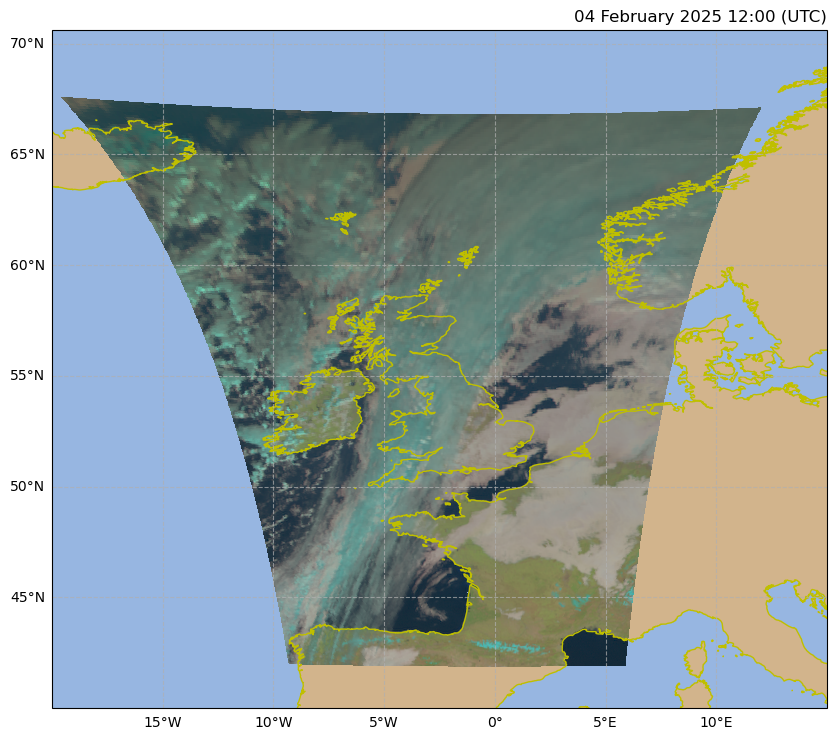

In [4]:
# Now we've loaded in some data, we can try and plot it! Let's start with a basic image...
# This data is from a satellite that only has a few channels, so it isn't going to look like something we see with the naked eye.
# For short-wave (SW) chnanels, we consider the reflectance, i.e. how much of the incoming sunlight is reflected at that wavelength.
# Load in the coords for the pixels
lons = satellite_data['lon']
lats = satellite_data['lat']
# Then load in the reflectances for each channel we want to use to generate the image
red = satellite_data['reflectance_in_channel_no_3']
green = satellite_data['reflectance_in_channel_no_2']
blue = satellite_data['reflectance_in_channel_no_1']
rgb = np.dstack( # This function stacks the data into a bigger dataset that we can then use to plot the image
    [
        red,
        green,
        blue
    ]
) ** (1/2.2) # This is a gamma stretch factor and it is used in photography to adjust how bright the image appears
# We now have an rgb, i.e. an image, we can plot it on a map and look at it
fig, ax = plt.subplots(
    1, 1,
    figsize = (10, 10),
    subplot_kw = {
        'projection' : ccrs.PlateCarree()
    }
)
# We can then decorate it to make it look a bit better where we don't have data and generally make it easier to interpret
ax.coastlines(
    resolution = '10m', # This adds coastlines to the map at 10m resolution
    color = 'y' # And plots them as bright yellow
) 
gl = ax.gridlines( # We can add grid lines to make it easier to see where things are
    draw_labels = True,
    linestyle = '--',
    alpha = 0.7
)
gl.right_labels = False # We don't want to have the right-hand labels as we might want to plot a colorbar there later
gl.top_labels = False # We don't want the top labels as they get in the way of any titles we might want to add
ax.add_feature(cf.LAND, color = 'tan') # We can fill in land as a light brown colour
ax.add_feature(cf.OCEAN) # We can fill in ocean as a light blue colour
# We can then plot the image
ax.pcolormesh(
    lons,
    lats,
    rgb,
)
# Finally, we can add a title telling us what the time and date of this image is
satellite_data_datetime = dt.strptime(
    satellite_data.Date_Created, # This is the datetime associated with the satellite data, but it's currently a string, not a datetime object
    "%Y%m%d%H%M" # This datetime is in the format of YYYYmmddHHMM
)
ax.set_title(
    satellite_data_datetime.strftime("%d %B %Y %H:%M (UTC)"),
    loc = 'right'
)
ax.set_extent([
    -20, 15,
    40, 70
])
# QUESTION: What channel combinations make the best images? What information can you get out of those images?

/home/users/dr1709/miniforge3/envs/WonderWeek2025/lib/python3.13/site-packages/xarray/coding/times.py:365: CFWarning: this date/calendar/year zero convention is not supported by CF
  cftime.num2date(num_dates, units, calendar, only_use_cftime_datetimes=True)
/home/users/dr1709/miniforge3/envs/WonderWeek2025/lib/python3.13/site-packages/xarray/coding/times.py:365: CFWarning: this date/calendar/year zero convention is not supported by CF
  cftime.num2date(num_dates, units, calendar, only_use_cftime_datetimes=True)


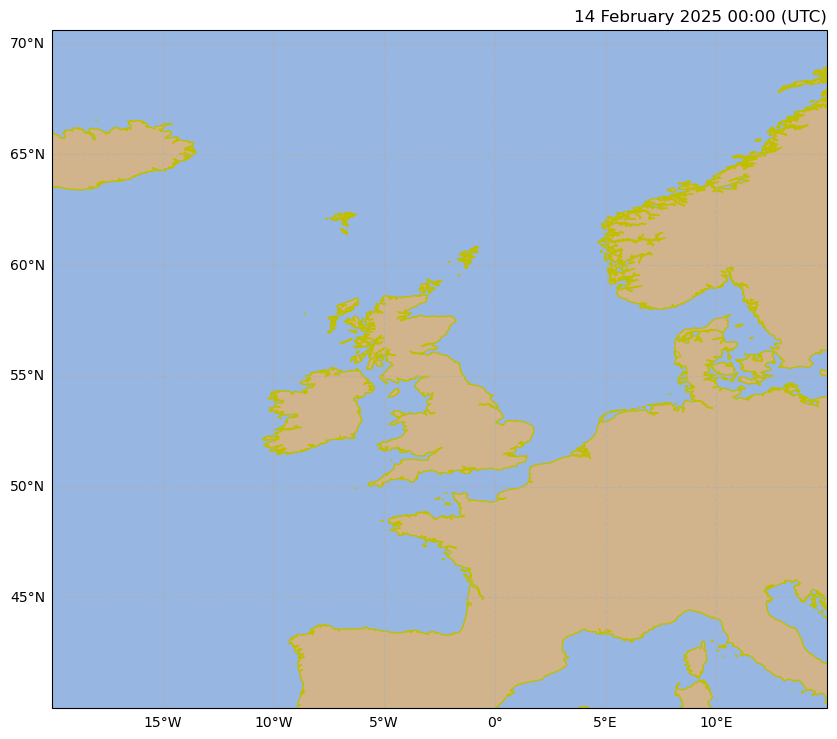

In [8]:
# We've successfully generated a single image, but we can take advantage of this particular type of satellite to do something better
# This satellite is goestationary, meaning it orbits at the same rate that the Earth spins and is effectively fixed about a given point
# Therefore, we can make a video of the same area from space!
# Let's try this for another day: 14th February 2025
day_of_interest = dt(2025, 2, 14)
# The satellite data we have available here is hourly, so we'll generate the image using 1 hour per frame
fig, ax = plt.subplots(
    1, 1,
    figsize = (10, 10),
    subplot_kw = {
        'projection' : ccrs.PlateCarree()
    }
)
# We'll use FuncAnimation for this, which requires a bit more advnaced programming
def update(hour):
    ax.clear()
    ax.set_extent([-20, 15, 40, 70])
    ax.coastlines(resolution = '10m', color = 'y')
    gl = ax.gridlines(draw_labels = True, linestyle = '--', alpha = 0.7)
    gl.right_labels = False
    gl.top_labels = False
    ax.add_feature(cf.LAND, color = 'tan')
    ax.add_feature(cf.OCEAN)
    # Find hourly data
    _dt = day_of_interest + timedelta(hours = hour)
    ax.set_title(_dt.strftime("%d %B %Y %H:%M (UTC)"), loc = 'right')
    try:
        _filename = f'NCEO-L2-CLOUD-AEROSOL-SEVIRI_ORAC_MSG3_{_dt.strftime("%Y%m%d%H%M")}_R9999.primary.nc'
        _full_filename = os.path.join(
            path_to_data,
            _dt.strftime("%Y"),
            _dt.strftime("%m"),
            _dt.strftime("%d"),
            _filename
        )
        satellite_data = xr.open_mfdataset([
                _full_filename.replace('.primary.', '.' + filetype + '.')
                for filetype
                in [
                    'primary',
                    'secondary',
                    'bugsrad'
                ]
        ])
        lons = satellite_data['lon']
        lats = satellite_data['lat']
        red = satellite_data['reflectance_in_channel_no_3']
        green = satellite_data['reflectance_in_channel_no_2']
        blue = satellite_data['reflectance_in_channel_no_1']
        rgb = np.dstack([red, green, blue]) ** (1/2.2)
        ax.pcolormesh(lons, lats, rgb)
    except:
        ax.text(
            x = 0.5, 
            y = 0.5, 
            s = 'NO DATA AVAILABLE',
            fontsize = 30,
            ha = 'center', 
            va = 'center',
            transform = ax.transAxes
        )
# Now we've plotted the frames, we can generate the animation
ani = animation.FuncAnimation(
    fig,
    update,
    frames = 24,
    interval = 100
)

In [12]:
gif_name = os.path.join(
    path_to_data,
    f'SEVIRINaturalColourRGBs_{day_of_interest.strftime("%Y%m%d")}.gif'
)
print(gif_name)
ani.save(
    gif_name,
    fps=3,
    savefig_kwargs = {
        "bbox_inches" : "tight"
    }
)

MovieWriter ffmpeg unavailable; using Pillow instead.


/gws/pw/j07/rsg_share/public/transfer/drobbins/small-scale/WonderWeekRSG2025/SISEM/SEVIRINaturalColourRGBs_20250214.gif


/home/users/dr1709/miniforge3/envs/WonderWeek2025/lib/python3.13/site-packages/xarray/coding/times.py:365: CFWarning: this date/calendar/year zero convention is not supported by CF
  cftime.num2date(num_dates, units, calendar, only_use_cftime_datetimes=True)
/home/users/dr1709/miniforge3/envs/WonderWeek2025/lib/python3.13/site-packages/xarray/coding/times.py:365: CFWarning: this date/calendar/year zero convention is not supported by CF
  cftime.num2date(num_dates, units, calendar, only_use_cftime_datetimes=True)
/home/users/dr1709/miniforge3/envs/WonderWeek2025/lib/python3.13/site-packages/xarray/coding/times.py:365: CFWarning: this date/calendar/year zero convention is not supported by CF
  cftime.num2date(num_dates, units, calendar, only_use_cftime_datetimes=True)
/home/users/dr1709/miniforge3/envs/WonderWeek2025/lib/python3.13/site-packages/xarray/coding/times.py:365: CFWarning: this date/calendar/year zero convention is not supported by CF
  cftime.num2date(num_dates, units, calend